<a href="https://colab.research.google.com/github/VitalyGladyshev/gb_pytorch/blob/main/HW_04_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ДЗ 4 Pytorch

## Задание 1

Необходимо доработать обучение нейросети, что мы разбирали на уроке.(Посмотрите чего не хватает в процессе обучения и подготовки данных)

In [1]:
pip install segmentation_models_pytorch

     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 245kB 20.4MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12420 sha256=1e62e8190e6dbb0a0c6801148ab9259c2eaa73fb36ddb913ae279975c000c767
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=3e5e70115cdc6b3cf29fa59b8ca60a6aaa2c1c47418e5c5d996acf1e913a084a
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built efficientnet-pytorch pretrainedmodels


In [2]:
import segmentation_models_pytorch as smp

In [3]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vitalygladyshev","key":"3353367a1e22b48542ed3c3946bdf3e4"}'}

In [5]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Dec 16 10:37 .
drwx------ 1 root root 4096 Dec 16 10:37 ..
-rw------- 1 root root   71 Dec 16 10:37 kaggle.json


In [ ]:
!kaggle datasets list -s lyft-udacity-challenge

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kumaresanmanickavelu/lyft-udacity-challenge               Semantic Segmentation for Self Driving Cars          5GB  2018-05-18 05:59:42           2000  
morrisb/semantic-segmentation-with-carla-and-tpus         Semantic Segmentation With CARLA And TPUs            3GB  2020-10-18 10:11:51             16  
austenmy/udacity-enrollments                              Udacity Enrollments                                 10KB  2018-04-06 00:54:43             91  
pbdanny/udacity-project-submissions                       Udacity Project Submission                          24KB  2018-05-10 11:41:36             45  
samtyagi/audacity-ab-testing                              audacity ab testing     

In [ ]:
!kaggle datasets download -d kumaresanmanickavelu/lyft-udacity-challenge
!ls

100% 5.11G/5.11G [01:46<00:00, 32.2MB/s]
100% 5.11G/5.11G [01:46<00:00, 51.6MB/s]
lyft-udacity-challenge.zip  sample_data


In [6]:
from zipfile import ZipFile

In [ ]:
zip_file = ZipFile('lyft-udacity-challenge.zip')
zip_file.extractall("./lyft-udacity-challenge")

In [ ]:
!ls -ls lyft-udacity-challenge

total 40
4 drwxr-xr-x 3 root root 4096 Dec 15 17:41 dataa
4 drwxr-xr-x 3 root root 4096 Dec 15 17:40 dataA
4 drwxr-xr-x 3 root root 4096 Dec 15 17:41 datab
4 drwxr-xr-x 3 root root 4096 Dec 15 17:40 dataB
4 drwxr-xr-x 3 root root 4096 Dec 15 17:41 datac
4 drwxr-xr-x 3 root root 4096 Dec 15 17:40 dataC
4 drwxr-xr-x 3 root root 4096 Dec 15 17:42 datad
4 drwxr-xr-x 3 root root 4096 Dec 15 17:40 dataD
4 drwxr-xr-x 3 root root 4096 Dec 15 17:42 datae
4 drwxr-xr-x 3 root root 4096 Dec 15 17:41 dataE


In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
labels = ['Unlabeled','Building','Fence','Other',
          'Pedestrian', 'Pole', 'Roadline', 'Road',
          'Sidewalk', 'Vegetation', 'Car','Wall',
          'Traffic sign']

In [ ]:
path = "lyft-udacity-challenge"

In [ ]:
cameraRGB = []
cameraSeg = []
for root, dirs, files in os.walk(path):
    for name in files:
        f = os.path.join(root, name)
        if 'CameraRGB' in f:
            cameraRGB.append(f)
        elif 'CameraSeg' in f:
            cameraSeg.append(f)
        else:
            break

In [ ]:
cameraRGB[-1], cameraSeg[-1]

('lyft-udacity-challenge/dataC/dataC/CameraRGB/F64-44.png',
 'lyft-udacity-challenge/dataC/dataC/CameraSeg/F64-44.png')

In [ ]:
df = pd.DataFrame({'cameraRGB': cameraRGB, 'cameraSeg': cameraSeg})
# Отсортируем  датафрейм по значениям
df.sort_values(by='cameraRGB',inplace=True)
# Используем функцию,
# лагодаря которой индексация значений 
# будет начинаться с 0.
df.reset_index(drop=True, inplace=True)
# Выведем первые ять значений нашего датафрейма
print(df.head(5))

                                           cameraRGB                                          cameraSeg
0  lyft-udacity-challenge/dataA/dataA/CameraRGB/0...  lyft-udacity-challenge/dataA/dataA/CameraSeg/0...
1  lyft-udacity-challenge/dataA/dataA/CameraRGB/0...  lyft-udacity-challenge/dataA/dataA/CameraSeg/0...
2  lyft-udacity-challenge/dataA/dataA/CameraRGB/0...  lyft-udacity-challenge/dataA/dataA/CameraSeg/0...
3  lyft-udacity-challenge/dataA/dataA/CameraRGB/0...  lyft-udacity-challenge/dataA/dataA/CameraSeg/0...
4  lyft-udacity-challenge/dataA/dataA/CameraRGB/0...  lyft-udacity-challenge/dataA/dataA/CameraSeg/0...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cameraRGB  10000 non-null  object
 1   cameraSeg  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [9]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn as nn
from torch.nn import functional as F
import time

In [ ]:
class CustomDatasetFromImages(Dataset):
    def __init__(self, data_info):
        # Подаем наш подготовленный датафрейм
        self.data_info = data_info
        
        # Разделяем датафрейм на rgb картинки 
        self.image_arr = self.data_info.iloc[:,0]
        # и на сегментированные картинки
        self.label_arr = self.data_info.iloc[:,1]
        
        # Количество пар картинка-сегментация
        self.data_len = len(self.data_info.index)
    def __getitem__(self, index):
        # Читаем картинку и сразу же представляем ее в виде numpy-массива 
        # размера 600х800 float-значний
        img = np.asarray(Image.open(self.image_arr[index])).astype('float')
        # Нормализуем изображение в значениях [0,1]
        img = torch.as_tensor(img)/255    
        # 1) unsqueeze - меняет размерность img c (600, 800, 3) -> (1, 600, 800, 3),
        # т.е. оборачивает картинку в батч размером в одну картинку
        # 2) permute - меняет местами измерения , т.е. (1, 600, 800, 3) -> (1, 3, 600, 800)
        img = img.unsqueeze(0).permute(0,3,1,2)
        # Мы используем функцию интерполяции для того,
        # чтобы поменять рамерность картинки с 800х600 на 256х256
        img = F.interpolate(input=img, size=256, align_corners=False, mode='bicubic')
        
        # итаем сегментированную картинку и сразу же представляем ее в виде numpy-массива 
        # размера 600х800 float-значний
        lab = np.asarray(plt.imread(self.label_arr[index]))[:,:,0]*255
        
        # Упаковываем ее в pytorch-тензор и оборачиваем ее в батч из одной каринки,
        # но при этом заполняем 13 каналов масками нужных классов
        # Т.е. там, где например класс автомобилей (10 по счету канал) - все пиксели 0 
        # если не принадлежат классу, и 1 если принадлежат 
        x_out = torch.as_tensor(np.where(lab == 0, 255, 0)).unsqueeze(0)
        for i in range(1, 13):
            mask = np.asarray(plt.imread(self.label_arr[index]))[:,:,0]*255
            mask = np.where(mask == i, 255, 0)
            x = torch.as_tensor(mask).unsqueeze(0)
            x_out =  torch.cat((x_out,x),dim=0)    
        x_out = x_out.float()
        
        lab = x_out.unsqueeze(0)
        # делаем ресайз картинки на 256х256
        lab = F.interpolate(input=lab, size=256, mode='nearest')
        
        return (img.float(), lab.float())

    def __len__(self):
        return self.data_len

In [ ]:
from sklearn.model_selection import train_test_split

# 80 % в тренировочную выборку, 20 - в тестовую
X_data, X_test = train_test_split(df, test_size=0.2)
# 20 - в валидационную
X_train, X_valid = train_test_split(X_data, test_size=0.2)

# Упорядочиваем индексацию
X_train.reset_index(drop=True,inplace=True)
X_valid.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

# Оборачиваем каждую выборку в наш кастомный датасет
train_data = CustomDatasetFromImages(X_train[:300])
valid_data = CustomDatasetFromImages(X_valid[:300])
test_data = CustomDatasetFromImages(X_test)

In [ ]:
batch_s = 10

train_data_loader = DataLoader(train_data, batch_size=batch_s, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=batch_s, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [62]:
class SoftDiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(SoftDiceLoss, self).__init__()

    def forward(self, logits, targets):
        smooth =1
        num = targets.size(0)
        probs = torch.sigmoid(logits)
        m1 = probs.view(num, -1)
        m2 = targets.view(num, -1)
        intersection = (m1 * m2)

        score =2. * (intersection.sum(1) + smooth) / (m1.sum(1) + m2.sum(1) + smooth)
        score =1 - score.sum() / num
        return score

In [ ]:
learning_rate = 0.001
epochs = 7

# создание модели
segmodel = smp.Unet('resnet34', classes=13, activation='softmax').to(device)

criterion = SoftDiceLoss()
optimizer = torch.optim.Adam(segmodel.parameters(), lr=learning_rate)

In [ ]:
path_checkpoint = "checkpoints"
if not os.path.exists(path_checkpoint):
    os.mkdir(path_checkpoint)

In [ ]:
ls -la

total 5357068
drwxr-xr-x  1 root root       4096 Dec 15 17:46 ./
drwxr-xr-x  1 root root       4096 Dec 15 18:56 ../
drwxr-xr-x  2 root root       4096 Dec 15 19:23 checkpoints/
drwxr-xr-x  1 root root       4096 Dec 10 17:17 .config/
drwxr-xr-x 12 root root       4096 Dec 15 17:42 lyft-udacity-challenge/
-rw-r--r--  1 root root 5485605432 Dec 15 17:39 lyft-udacity-challenge.zip
drwxr-xr-x  1 root root       4096 Dec  2 22:04 sample_data/


In [ ]:
epoch_losses = []
epoch_val_losses = []

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    cum_loss = []

    print(f'Epoch: {epoch+1}')
    time1 = time.time()
    segmodel.train()
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device) # .cuda()
        labels = labels.to(device) # .cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = segmodel(inputs[0])
        loss = criterion(outputs, labels[0,0,:,:,:])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        cum_loss.append(loss.item())
        if not (i+1) % 10:    # print every 10 mini-batches
            print(f'\tbatchcount: {i+1}, avg. loss for last {batch_s*10} images: {running_loss/(batch_s*10):.5f}')
            running_loss = 0.0

    time2 = time.time()
    epoch_losses.append(np.mean(cum_loss))
    torch.save(segmodel.state_dict(), path_checkpoint + f"/checkpoint_ep_{epoch}.pth")

    cum_loss = []
    segmodel.eval()
    with torch.no_grad():
        running_val_loss = 0.0
        for i, data in enumerate(valid_data_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device) # .cuda()
            labels = labels.to(device) # .cuda()

            outputs = segmodel(inputs[0])
            loss = criterion(outputs, labels[0,0,:,:,:])

            running_val_loss += loss.item()
            cum_loss.append(loss.item())

    epoch_val_losses.append(np.mean(cum_loss))
    print(f'\n  Epoch {epoch+1}, loss: {epoch_losses[-1]:.5f} loss_val: {epoch_val_losses[-1]:.5f} time = {time2-time1:.2f} sec\n')

Epoch: 1


/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:102: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


	batchcount: 10, avg. loss for last 100 images: 0.02925
	batchcount: 20, avg. loss for last 100 images: 0.02150
	batchcount: 30, avg. loss for last 100 images: 0.01630

  Epoch 1, loss: 0.22349 loss_val: 0.16014 time = 119.72 sec

Epoch: 2
	batchcount: 10, avg. loss for last 100 images: 0.01411
	batchcount: 20, avg. loss for last 100 images: 0.01426
	batchcount: 30, avg. loss for last 100 images: 0.00962

  Epoch 2, loss: 0.12664 loss_val: 0.14178 time = 117.87 sec

Epoch: 3
	batchcount: 10, avg. loss for last 100 images: 0.01564
	batchcount: 20, avg. loss for last 100 images: 0.01297
	batchcount: 30, avg. loss for last 100 images: 0.00866

  Epoch 3, loss: 0.12420 loss_val: 0.09678 time = 117.88 sec

Epoch: 4
	batchcount: 10, avg. loss for last 100 images: 0.00896
	batchcount: 20, avg. loss for last 100 images: 0.00977
	batchcount: 30, avg. loss for last 100 images: 0.01321

  Epoch 4, loss: 0.10650 loss_val: 0.09771 time = 117.85 sec

Epoch: 5
	batchcount: 10, avg. loss for last 100 

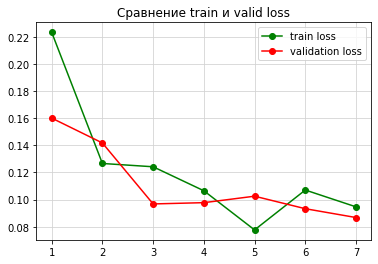

In [ ]:
plt.plot(np.arange(1, 8), epoch_losses, 'go-', label='train loss')
plt.plot(np.arange(1, 8), epoch_val_losses, 'ro-', label='validation loss')

plt.legend(loc="upper right")
plt.grid(color="lightgrey")
plt.title('Сравнение train и valid loss' )
plt.show()

## Задание 2

Необходимо скачать и подготовить датасет https://www.kaggle.com/olekslu/makeup-lips-segmentation-28k-samples/notebooks для обучения модели на губы(т.е. 2 класса: губы/не губы).

In [10]:
!kaggle datasets list -s lipstick

ref                                                 title                                      size  lastUpdated          downloadCount  
--------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
olgabelitskaya/quick-draw-images-from-key-points-4  Quick, Draw! Images from Key Points 4     350MB  2020-07-25 06:57:20              9  
olekslu/makeup-lips-segmentation-28k-samples        Makeup. Pixel Perfect Lips Segmentation.    2GB  2020-06-10 09:00:21            124  
pevogam/cognitive-stimuli                           Cognitive stimuli                         254MB  2020-11-01 11:25:16              7  


In [11]:
!kaggle datasets download -d olekslu/makeup-lips-segmentation-28k-samples
!ls

100% 2.38G/2.38G [00:32<00:00, 33.5MB/s]
100% 2.38G/2.38G [00:32<00:00, 78.4MB/s]
makeup-lips-segmentation-28k-samples.zip  sample_data


In [12]:
from zipfile import ZipFile

zip_file = ZipFile('makeup-lips-segmentation-28k-samples.zip')
zip_file.extractall("./lips_segmentation")

In [13]:
!ls -la ./lips_segmentation/set-lipstick-original

total 3992
drwxr-xr-x 4 root root    4096 Dec 16 10:40 .
drwxr-xr-x 3 root root    4096 Dec 16 10:39 ..
drwxr-xr-x 2 root root 1232896 Dec 16 10:40 720p
-rw-r--r-- 1 root root 1858818 Dec 16 10:40 list.csv
drwxr-xr-x 2 root root  983040 Dec 16 10:40 mask


In [14]:
path_img = "./lips_segmentation/set-lipstick-original/720p"
path_mask = "./lips_segmentation/set-lipstick-original/mask"

images = []
masks = []

for root, dirs, files in os.walk(path_img):
    for name in files:
        f = os.path.join(root, name)
        if 'image' in f:
            images.append(f)
        else:
            break

for root, dirs, files in os.walk(path_mask):
    for name in files:
        f = os.path.join(root, name)
        if 'mask' in f:
            masks.append(f)
        else:
            break

In [15]:
len(images), len(masks), images[-1], masks[-1]

(28594,
 28540,
 './lips_segmentation/set-lipstick-original/720p/image00027582.jpg',
 './lips_segmentation/set-lipstick-original/mask/mask00026740.png')

In [16]:
images[0], images[0][-12:-4]

('./lips_segmentation/set-lipstick-original/720p/image00006439.jpg',
 '00006439')

In [17]:
images_w_mask = []

for img in images:
    for mask in masks:
        if img[-12:-4] == mask[-12:-4]:
            images_w_mask.append(img)
            break

In [18]:
len(images_w_mask), images_w_mask[10000], masks[10000]

(28540,
 './lips_segmentation/set-lipstick-original/720p/image00010300.jpg',
 './lips_segmentation/set-lipstick-original/mask/mask00026785.png')

In [19]:
masks_adapt = []

for img in images_w_mask:
    masks_adapt.append(f"./lips_segmentation/set-lipstick-original/mask/mask{img[-12:-4]}.png")

In [20]:
images_w_mask[10000], masks_adapt[10000]

('./lips_segmentation/set-lipstick-original/720p/image00010300.jpg',
 './lips_segmentation/set-lipstick-original/mask/mask00010300.png')

In [21]:
df = pd.DataFrame({'images': images_w_mask, 'masks': masks_adapt})
# Отсортируем  датафрейм по значениям
df.sort_values(by='images',inplace=True)
# Используем функцию,
# лагодаря которой индексация значений 
# будет начинаться с 0.
df.reset_index(drop=True, inplace=True)

# Выведем первые ять значений нашего датафрейма
pd.set_option('display.max_colwidth', 70)
print(df.tail(5))

                                                                 images                                                            masks
28535  ./lips_segmentation/set-lipstick-original/720p/image00028590.jpg  ./lips_segmentation/set-lipstick-original/mask/mask00028590.png
28536  ./lips_segmentation/set-lipstick-original/720p/image00028591.jpg  ./lips_segmentation/set-lipstick-original/mask/mask00028591.png
28537  ./lips_segmentation/set-lipstick-original/720p/image00028592.jpg  ./lips_segmentation/set-lipstick-original/mask/mask00028592.png
28538  ./lips_segmentation/set-lipstick-original/720p/image00028593.jpg  ./lips_segmentation/set-lipstick-original/mask/mask00028593.png
28539  ./lips_segmentation/set-lipstick-original/720p/image00028594.jpg  ./lips_segmentation/set-lipstick-original/mask/mask00028594.png


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28540 entries, 0 to 28539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  28540 non-null  object
 1   masks   28540 non-null  object
dtypes: object(2)
memory usage: 446.1+ KB


In [23]:
img = np.asarray(Image.open(images_w_mask[0])).astype('float')
img.shape

(720, 1280, 3)

In [24]:
img = torch.as_tensor(img)/255
img = img.unsqueeze(0)
print(img.shape)
img = img.permute(0,3,1,2)
print(img.shape)
img = F.interpolate(input=img, size=256, align_corners=False, mode='bicubic')
print(img.shape)

torch.Size([1, 720, 1280, 3])
torch.Size([1, 3, 720, 1280])
torch.Size([1, 3, 256, 256])


In [25]:
mask_it = np.asarray(Image.open(masks_adapt[-1])).astype('int')
mask_it.shape

(720, 1280, 3)

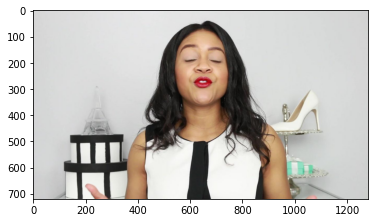

In [70]:
plt.imshow(Image.open(images_w_mask[-1]))

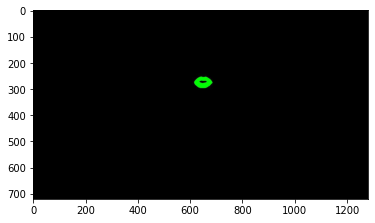

In [26]:
plt.imshow(mask_it)

In [27]:
mask_it[280, 600:605, :]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [28]:
min(mask_it[mask_it>0]), max(mask_it[mask_it>0]), np.mean(mask_it[mask_it>0])

(1, 255, 71.01086178085463)

In [29]:
mask_it[mask_it[:, :, 1]>0]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 2, 0],
       [0, 2, 0]])

In [30]:
lab = np.asarray(plt.imread(masks_adapt[-1]))[:,:,1] #.astype('int')
lab.shape

(720, 1280)

In [31]:
min(lab[lab>0]), max(lab[lab>0]), np.mean(lab[lab>0])

(0.003921569, 1.0, 0.595959)

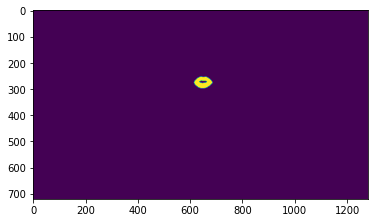

In [32]:
lab[lab>0.4] = 255
plt.imshow(lab)

In [33]:
lab_2 = np.asarray(Image.open(masks_adapt[-1]))[:,:,1]
lab_2.shape

(720, 1280)

In [34]:
min(lab_2[lab_2>0]), max(lab_2[lab_2>0]), np.mean(lab_2[lab_2>0])

(1, 255, 151.96955036994876)

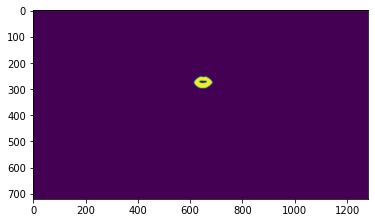

In [35]:
# lab_2[lab_2 > 0] = 255
plt.imshow(lab_2)

In [36]:
lab = np.asarray(plt.imread(masks_adapt[-1]))[:,:,1] #.astype('int')
lab.shape

(720, 1280)

In [37]:
lab[lab<0.4] = 0
lab[lab>=0.4] = 1

In [38]:
min(lab[lab>0]), max(lab[lab>0]), np.mean(lab[lab>0])

(1.0, 1.0, 1.0)

In [39]:
lab = torch.as_tensor(lab)
print(lab.shape)
lab = lab.unsqueeze(0).unsqueeze(0)
print(lab.shape)
lab = F.interpolate(input=lab, size=256, mode='nearest')
print(lab.shape)

torch.Size([720, 1280])
torch.Size([1, 1, 720, 1280])
torch.Size([1, 1, 256, 256])


In [76]:
lab = np.asarray(plt.imread(masks_adapt[-1]))[:,:,1]

f_lp = np.where(lab<0.4, 255, 0)
t_lp = np.where(lab>=0.4, 255, 0)

f_lp.shape, t_lp.shape

((720, 1280), (720, 1280))

In [90]:
f_lp[260:290, 614:627]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255,   0,   0,   0,   0, 

In [91]:
t_lp[260:290, 614:627]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 

In [54]:
lab = np.asarray(plt.imread(masks_adapt[-1]))[:,:,1]

f_lp = torch.as_tensor(np.where(lab<0.4, 255, 0)).unsqueeze(0)
t_lp = torch.as_tensor(np.where(lab>=0.4, 255, 0)).unsqueeze(0)

t_lp = torch.cat((t_lp, f_lp), dim=0).unsqueeze(0)
lab = F.interpolate(input=t_lp.float(), size=256, mode='nearest')
lab.shape

torch.Size([1, 2, 256, 256])

In [113]:
class CustomDatasetFromImages(Dataset):
    def __init__(self, data_info):
        # Подаем наш подготовленный датафрейм
        self.data_info = data_info
        
        # Разделяем датафрейм на rgb картинки 
        self.image_arr = self.data_info.iloc[:,0]
        # и на сегментированные картинки
        self.label_arr = self.data_info.iloc[:,1]
        
        # Количество пар картинка-сегментация
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Читаем картинку и сразу же представляем ее в виде numpy-массива 
        # размера 720х1280 float-значний
        img = np.asarray(Image.open(self.image_arr[index])).astype('float')
        # Нормализуем изображение в значениях [0,1]
        img = torch.as_tensor(img)/255    
        # 1) unsqueeze - меняет размерность img c (720, 1280, 3) -> (1, 720, 1280, 3),
        # т.е. оборачивает картинку в батч размером в одну картинку
        # 2) permute - меняет местами измерения , т.е. (1, 720, 1280, 3) -> (1, 3, 720, 1280)
        img = img.unsqueeze(0).permute(0,3,1,2)
        # Мы используем функцию интерполяции для того,
        # чтобы поменять рамерность картинки с 1280х720 на 256х256
        img = F.interpolate(input=img, size=256, align_corners=False, mode='bicubic')
        
        # итаем сегментированную картинку и сразу же представляем ее в виде numpy-массива 
        lab = np.asarray(plt.imread(self.label_arr[index]))[:,:,1]

        f_lp = torch.as_tensor(np.where(lab<0.4, 255, 0)).unsqueeze(0)
        t_lp = torch.as_tensor(np.where(lab>=0.4, 255, 0)).unsqueeze(0)

        t_lp = torch.cat((t_lp, f_lp), dim=0).unsqueeze(0)
        # делаем ресайз картинки на 256х256
        lab = F.interpolate(input=t_lp.float(), size=256, mode='nearest')

        return (img.float(), lab.float())

    def __len__(self):
        return self.data_len

In [114]:
from sklearn.model_selection import train_test_split

# 80 % в тренировочную выборку, 20 - в тестовую
X_data, X_test = train_test_split(df, test_size=0.2)
# 20 - в валидационную
X_train, X_valid = train_test_split(X_data, test_size=0.2)

# Упорядочиваем индексацию
X_train.reset_index(drop=True,inplace=True)
X_valid.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

# Оборачиваем каждую выборку в наш кастомный датасет
train_data = CustomDatasetFromImages(X_train[:90])
valid_data = CustomDatasetFromImages(X_valid[:90])
test_data = CustomDatasetFromImages(X_test)

In [115]:
batch_s = 3

train_data_loader = DataLoader(train_data, batch_size=batch_s, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=batch_s, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [116]:
labels = ['NoLips','Lips']

## Задание 3

Обучить Модель на выбор из segmentation_models_pytorch

In [117]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [118]:
learning_rate = 0.001
epochs = 7

# создание модели
segmodel = smp.Unet('resnet34', classes=2, activation='softmax').to(device)

criterion = SoftDiceLoss()
optimizer = torch.optim.Adam(segmodel.parameters(), lr=learning_rate)

In [119]:
path_checkpoint = "checkpoints_lp"
if not os.path.exists(path_checkpoint):
    os.mkdir(path_checkpoint)

In [120]:
epoch_losses = []
epoch_val_losses = []

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    cum_loss = []

    print(f'Epoch: {epoch+1}')
    time1 = time.time()
    segmodel.train()
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device) # .cuda()
        labels = labels.to(device) # .cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = segmodel(inputs[0])
        loss = criterion(outputs, labels[0,:,:,:])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        cum_loss.append(loss.item())
        if not (i+1) % 10:    # print every 10 mini-batches
            print(f'\tbatchcount: {i+1}, avg. loss for last {batch_s*10} images: {running_loss/(batch_s*10):.5f}')
            running_loss = 0.0

    time2 = time.time()
    epoch_losses.append(np.mean(cum_loss))
    torch.save(segmodel.state_dict(), path_checkpoint + f"/checkpoint_lp_ep_{epoch}.pth")

    cum_loss = []
    segmodel.eval()
    with torch.no_grad():
        running_val_loss = 0.0
        for i, data in enumerate(valid_data_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device) # .cuda()
            labels = labels.to(device) # .cuda()

            outputs = segmodel(inputs[0])
            loss = criterion(outputs, labels[0,:,:,:])

            running_val_loss += loss.item()
            cum_loss.append(loss.item())

    epoch_val_losses.append(np.mean(cum_loss))
    print(f'\n  Epoch {epoch+1}, loss: {epoch_losses[-1]:.5f} loss_val: {epoch_val_losses[-1]:.5f} time = {time2-time1:.2f} sec\n')

Epoch: 1


/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:102: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


	batchcount: 10, avg. loss for last 30 images: -0.08831
	batchcount: 20, avg. loss for last 30 images: -0.11779
	batchcount: 30, avg. loss for last 30 images: -0.13226

  Epoch 1, loss: -0.33837 loss_val: -0.42683 time = 8.61 sec

Epoch: 2
	batchcount: 10, avg. loss for last 30 images: -0.14264
	batchcount: 20, avg. loss for last 30 images: -0.14704
	batchcount: 30, avg. loss for last 30 images: -0.14802

  Epoch 2, loss: -0.43770 loss_val: -0.45013 time = 8.54 sec

Epoch: 3
	batchcount: 10, avg. loss for last 30 images: -0.14969
	batchcount: 20, avg. loss for last 30 images: -0.15034
	batchcount: 30, avg. loss for last 30 images: -0.15043

  Epoch 3, loss: -0.45046 loss_val: -0.45055 time = 8.51 sec

Epoch: 4
	batchcount: 10, avg. loss for last 30 images: -0.15043
	batchcount: 20, avg. loss for last 30 images: -0.14901
	batchcount: 30, avg. loss for last 30 images: -0.15024

  Epoch 4, loss: -0.44968 loss_val: -0.45061 time = 8.41 sec

Epoch: 5
	batchcount: 10, avg. loss for last 30 i

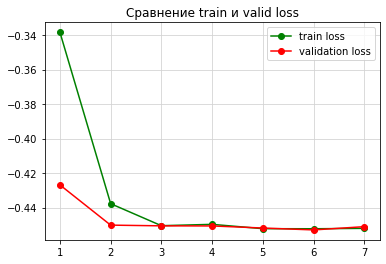

In [121]:
plt.plot(np.arange(1, 8), epoch_losses, 'go-', label='train loss')
plt.plot(np.arange(1, 8), epoch_val_losses, 'ro-', label='validation loss')

plt.legend(loc="upper right")
plt.grid(color="lightgrey")
plt.title('Сравнение train и valid loss' )
plt.show()

## Задание 4

Переделайте архитектуру декодера Unet так, как в этой работе https://www.ics.uci.edu/~haoyum3/papers/slides_icivc.pdf. Эта тема пересекается с темой о второго вебинара о LSTM-сетях. И попробуйте обучить получившуюся нейронную сеть.